In [15]:
# import required modules

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.tools.tools as stattools
import random
import graphviz
import scipy, pylab
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from pandas.plotting import radviz
from datetime import datetime
from scipy import stats

In [16]:
# read dataset and save it to variable traffic_violations

traffic_violations = pd.read_csv("/home/mafunami/Windows_SSD_250/Users/Jahn/PythonSRC/Testing_environment/Datasets/Refined_Traffic_Violations-v5.csv")

/tmp/ipykernel_58193/3487703032.py:1: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  traffic_violations = pd.read_csv("/home/mafunami/Windows_SSD_250/Users/Jahn/PythonSRC/Testing_environment/Datasets/Refined_Traffic_Violations-v5.csv")


In [17]:
# show raw and unedited dataset (1 record)

traffic_violations.loc[0]

Date Of Stop                                                      09/24/2013
Time Of Stop                                                        17:11:00
Agency                                                                   MCP
SubAgency                                        3rd district, Silver Spring
Description                DRIVING VEHICLE ON HIGHWAY WITH SUSPENDED REGI...
Location                                                     8804 FLOWER AVE
Latitude                                                                 NaN
Longitude                                                                NaN
Accident                                                                  No
Belts                                                                     No
Personal Injury                                                           No
Property Damage                                                           No
Fatal                                                                     No

In [ ]:
# Drop irrelevant and unnecessary features

traffic_violations.drop(['Agency', 'SubAgency', 'Description', 'Location', 'Commercial License', 'HAZMAT', 'Commercial Vehicle', 'Work Zone', 'State','Year','Model','Color','Charge', 'Contributed To Accident', 'Race', 'Gender', 'Driver City', 'DL State', 'Property Damage', 'VehicleType', 'Article', 'Driver State', 'Arrest Type'], axis = 1, inplace=True)

In [19]:
# Show current dataset (1 record)

traffic_violations.loc[0]

Date Of Stop       09/24/2013
Time Of Stop         17:11:00
Latitude                  NaN
Longitude                 NaN
Accident                   No
Belts                      No
Personal Injury            No
Fatal                      No
Alcohol                    No
Make                     FORD
Violation Type       Citation
Geolocation               NaN
Name: 0, dtype: object

In [20]:
# get dataset size in columns and rows

traffic_violations.shape

(1015270, 12)

In [21]:
# Create new columns such as index with the shape output as reference
# and Brand with Make as reference

traffic_violations['index'] = pd.Series(range(0, 1015270))
traffic_violations['Brand'] = traffic_violations['Make']

dict_Brand = {"Brand": {"ACURA": 0, "BMW": 1, "BUICK": 2, "CADILLAC": 3, "CAMRY": 4, "CHEVROLET": 5 , "CHRYSLER": 6, "DODGE": 7, "FORD": 8, "FREIGHTLINER": 9, "FREIGHTTRACK": 10, "GRAND_MARQUIS": 11, "HARLEYDAVIDSON": 12, "HONDA": 13, "HYUNDAI": 14, "INFINITY": 15, "INTERNATIONAL": 16, "ISUZU": 17, "JAGUAR": 18, "KAWASAKI": 19, "LANDCRUISER": 20, "LAND_ROVER": 21, "LEXUS": 22, "LINCOLN": 23, "MAZDA": 24, "MERCEDES": 25, "MINI_COOPER": 26, "MITSUBISHI": 27, "NISSAN": 28, "OLDSMOBILE": 29, "PONTIAC": 30, "PORSCHE": 31, "RANGE_ROVER": 32, "SUBARU": 33, "SUZUKI": 34, "TOYOTA": 35, "VOLVO": 36, "VOLKSWAGEN": 37, "YAMAHA": 38}}
traffic_violations['Brand'] = traffic_violations['Brand'].map(dict_Brand['Brand'])

Frequency of Car Manufacturer brands in traffic violations


<AxesSubplot:>

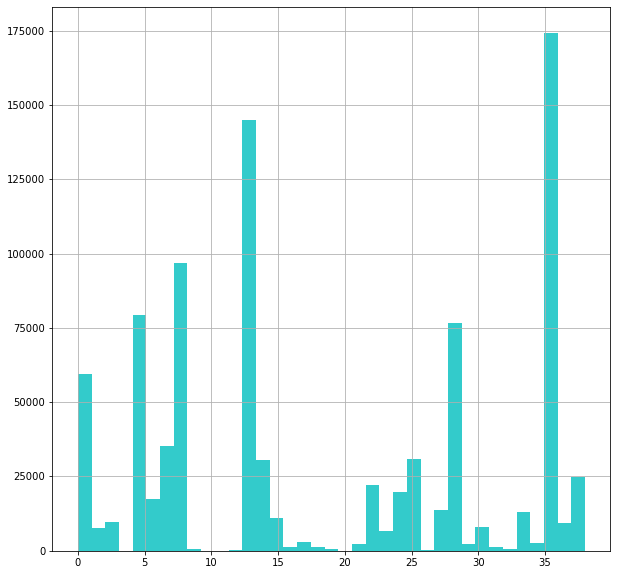

In [22]:
# visualize the frequency of car manufacturer in records within
# traffic violations

print('Frequency of Car Manufacturer brands in traffic violations')
traffic_violations['Brand'].hist(color='c', alpha = .8, bins = 37, figsize = (10,10))

In [ ]:
# Preparing the data of belts and personal injury

FactorsCrosstab = pd.crosstab(traffic_violations['Belts'], traffic_violations['Alcohol'])
medicalCrosstab = pd.crosstab(traffic_violations['Personal Injury'], traffic_violations['Fatal'])


In [23]:
# Preparing the date and time data for visualization over the course
# of years and time (in 24-hour format)


# create new dataframes for date of stop and time of stop
tfy_df = traffic_violations['Date Of Stop'].value_counts().rename_axis('Date').reset_index(name='Count')
tfh_df = traffic_violations['Time Of Stop'].value_counts().rename_axis('Time').reset_index(name='Count')

# convert the records to proper date and time format using to_datetime
tfy_df['Date'] = pd.to_datetime(tfy_df['Date'])
# given that year is the subject, .dt.year is used
tfy_df['YEAR'] = tfy_df['Date'].dt.year
# group the data by years starting from 2012-2016
tfy_df = tfy_df.groupby(tfy_df['YEAR']).sum()

# convert the records to proper date and time format using to_datetime
tfh_df['Time'] = pd.to_datetime(tfh_df['Time'])
# given that year is the subject, .dt.hour is used
tfh_df['HOUR'] = tfh_df['Time'].dt.hour
# group the data by hour using 24-hour format
tfh_df = tfh_df.groupby(tfh_df['HOUR']).sum()


/tmp/ipykernel_58193/3768803013.py:9: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  tfy_df = tfy_df.groupby(tfy_df['YEAR']).sum()
/tmp/ipykernel_58193/3768803013.py:13: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  tfh_df = tfh_df.groupby(tfh_df['HOUR']).sum()


Text(0, 0.5, 'Frequency')

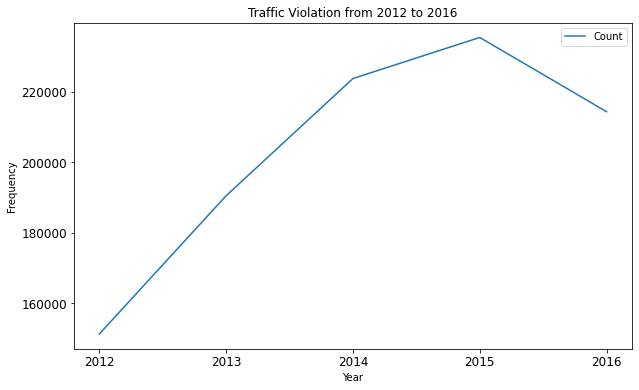

In [24]:
# plot the dataset year grouped and formatting the graph as follows

yearplot = tfy_df.plot(title='Traffic Violation from 2012 to 2016', figsize = (10,6), fontsize = 12)
yearplot.set_xticks(tfy_df.index)
yearplot.set_xlabel("Year")
yearplot.set_ylabel("Frequency")

Text(0, 0.5, 'Frequency')

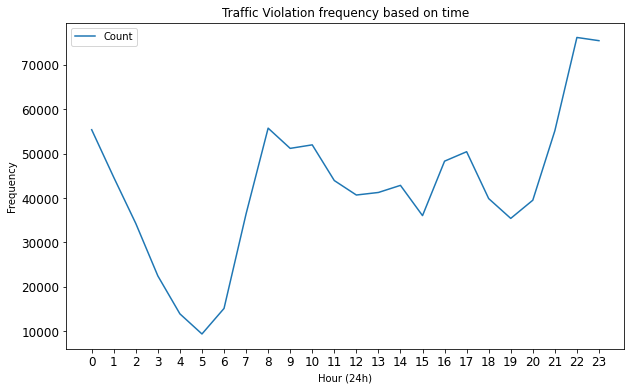

In [25]:
# plot the dataset hour grouped and formatting the graph as follows

hourplot = tfh_df.plot(title='Traffic Violation frequency based on time', figsize = (10,6), fontsize = 12)
hourplot.set_xticks(tfh_df.index)
hourplot.set_xlabel("Hour (24h)")
hourplot.set_ylabel("Frequency")

In [26]:
#import and drop irrelevant data
trafficVs = pd.read_csv("/home/mafunami/Windows_SSD_250/Users/Jahn/PythonSRC/Testing_environment/Datasets/Refined_Traffic_Violations-v5.csv")
trafficVs.drop(['Agency', 'SubAgency', 'Description', 'Location', 'Commercial License', 'HAZMAT', 'Commercial Vehicle', 'Work Zone', 'State','Year','Model','Color','Charge', 'Contributed To Accident', 'Race', 'Gender', 'Driver City', 'DL State', 'Property Damage', 'VehicleType', 'Article', 'Driver State', 'Arrest Type'], axis = 1, inplace=True)

#split dataset into train and test
traffic_train, traffic_test = train_test_split (trafficVs, test_size = 0.25, random_state = 7)

/tmp/ipykernel_58193/2090408251.py:1: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  trafficVs = pd.read_csv("/home/mafunami/Windows_SSD_250/Users/Jahn/PythonSRC/Testing_environment/Datasets/Refined_Traffic_Violations-v5.csv")


In [27]:
# resampling alcohol column to be used in modeling
to_resampleB = traffic_train.loc[traffic_train['Alcohol'] == "Yes"]
new_resampleB = to_resampleB.sample(n=323530, replace = True)
traffic_trainRebalB = pd.concat([traffic_train, new_resampleB])

# creating new columns to equate to Alcohol and Personal Injury
traffic_trainRebalB['AlcoholNum'] = traffic_trainRebalB['Alcohol']
traffic_trainRebalB['PInjuryNum'] = traffic_trainRebalB['Personal Injury']

# converting the values in the newly created columns into a 1 for yes and 0 for no
trainAlcohol_dict = {'Alcohol': {'Yes': 1, 'No': 0}}
trainPInjury_dict = {'Personal Injury': {'Yes': 1, 'No': 0}}

# Assigining converted values into the respective columns
traffic_trainRebalB['AlcoholNum'].replace(trainAlcohol_dict['Alcohol'], inplace=True)
traffic_trainRebalB['PInjuryNum'].replace(trainPInjury_dict['Personal Injury'], inplace=True)

# creating new array using the Violation Type which is a categorical data
violT_np = np.array(traffic_trainRebalB['Violation Type'])
# saving the processed categorical data to a list and a dictionary
(viol_cat,viol_cat_dict) = stattools.categorical(violT_np, drop=True, dictnames = True)

# creating a new pandas dataframe using the viol_cat list
viol_cat_pd = pd.DataFrame(viol_cat)
# resetting the index of the training dataset
traffic_trainRebalB = traffic_trainRebalB.reset_index()

# assigning respective x and y values, with y being the target variable
x = pd.concat((traffic_trainRebalB[['AlcoholNum']], viol_cat_pd), axis = 1)
y = traffic_trainRebalB[['PInjuryNum']]

# properly labeling the x and y axises
xlabels = ['Alcohol','Citation','Warning','ESERO']
ylabels = ['Yes', 'No']

# Creating a model using C5.0 algorithm
trainTree = DecisionTreeClassifier(criterion='entropy',max_leaf_nodes = 5).fit(x,y)
# Creating a model using C5.0 algorithm
traincart = DecisionTreeClassifier(criterion='gini',max_leaf_nodes = 5).fit(x,y)

# Saving outputs as graphs
traindata1 = export_graphviz(trainTree, out_file=None, feature_names=xlabels, class_names=ylabels)
traindata2 = export_graphviz(traincart, out_file=None, feature_names=xlabels, class_names=ylabels)


/home/mafunami/.local/lib/python3.10/site-packages/statsmodels/tools/tools.py:152: FutureWarning: categorical is deprecated. Use pandas Categorical to represent categorical data and can get_dummies to construct dummy arrays. It will be removed after release 0.13.
  warnings.warn(
/home/mafunami/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/home/mafunami/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


In [28]:
trafficViolations = pd.read_csv("/home/mafunami/Windows_SSD_250/Users/Jahn/PythonSRC/Testing_environment/Datasets/Refined_Traffic_Violations-v5.csv")
trafficViolations.drop(['Agency', 'SubAgency', 'Description', 'Location', 'Commercial License', 'HAZMAT', 'Commercial Vehicle', 'Work Zone', 'State','Year','Model','Color','Charge', 'Contributed To Accident', 'Race', 'Gender', 'Driver City', 'DL State', 'Property Damage', 'VehicleType', 'Article', 'Driver State', 'Arrest Type'], axis = 1, inplace=True)

/tmp/ipykernel_58193/4256622423.py:1: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  trafficViolations = pd.read_csv("/home/mafunami/Windows_SSD_250/Users/Jahn/PythonSRC/Testing_environment/Datasets/Refined_Traffic_Violations-v5.csv")


In [29]:
trafficViolations['AlcoholNum'] = trafficViolations['Alcohol']
trafficViolations['PInjuryNum'] = trafficViolations['Personal Injury']

TrueAlcohol_dict = {'Alcohol': {'Yes': 1, 'No': 0}}
TruePInjury_dict = {'Personal Injury': {'Yes': 1, 'No': 0}}

trafficViolations['AlcoholNum'].replace(TrueAlcohol_dict['Alcohol'], inplace=True)
trafficViolations['PInjuryNum'].replace(TruePInjury_dict['Personal Injury'], inplace=True)

violation_np = np.array(trafficViolations['Violation Type'])
(violation_cat, violation_cat_dict) = stattools.categorical(violation_np, drop = True, dictnames = True)
violation_cat_pd = pd.DataFrame(violation_cat)

X = pd.concat((trafficViolations['AlcoholNum'], violation_cat_pd), axis =1)
Y = trafficViolations['PInjuryNum']

Xlabels = ['Alcohol','Citation','Warning','ESERO']
Ylabels = ['Yes', 'No']

TrueTree = DecisionTreeClassifier(criterion='entropy',max_leaf_nodes = 5).fit(X,Y)
Truecart = DecisionTreeClassifier(criterion='gini',max_leaf_nodes = 5).fit(X,Y)

Truedata1 = export_graphviz(TrueTree, out_file=None, feature_names=Xlabels, class_names=Ylabels)
Truedata2 = export_graphviz(Truecart, out_file=None, feature_names=Xlabels, class_names=Ylabels)

/home/mafunami/.local/lib/python3.10/site-packages/statsmodels/tools/tools.py:152: FutureWarning: categorical is deprecated. Use pandas Categorical to represent categorical data and can get_dummies to construct dummy arrays. It will be removed after release 0.13.
  warnings.warn(
/home/mafunami/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/home/mafunami/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


True data (entropy)


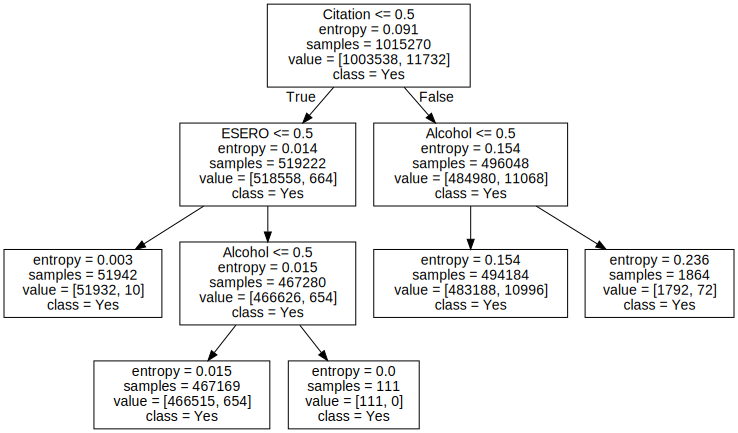

In [30]:
print('True data (entropy)')
graphviz.Source(Truedata1)

Training data (entropy)


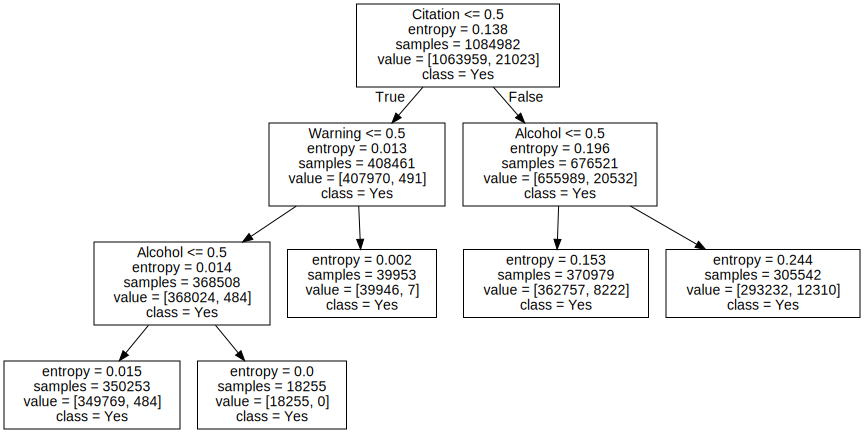

In [31]:
print('Training data (entropy)')
graphviz.Source(traindata1)

True data (gini)


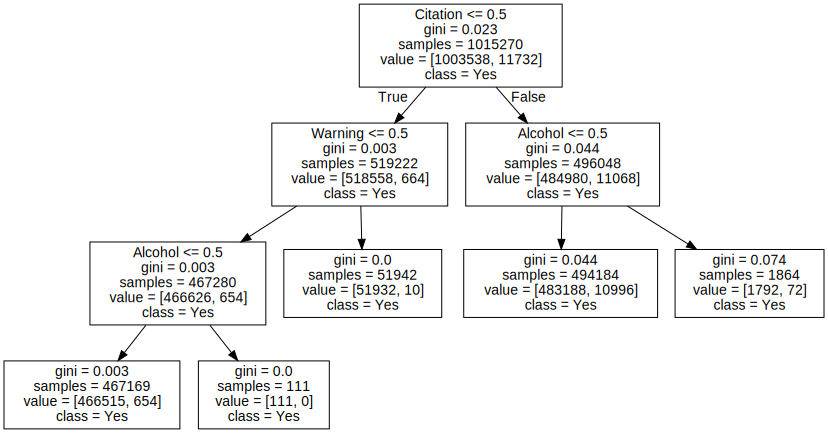

In [32]:
print('True data (gini)')
graphviz.Source(Truedata2)

Training data (gini)


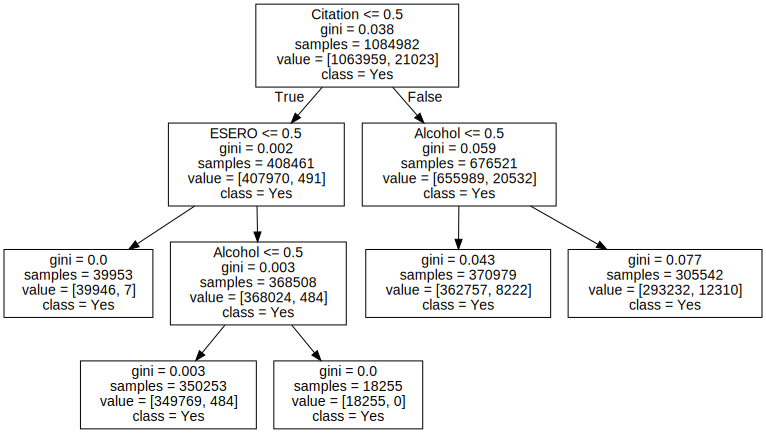

In [33]:
print('Training data (gini)')
graphviz.Source(traindata2)

In [34]:
"""
---------------EVALUATION---------------

X and Y are the true datasets
x and y are the training datasets
"""

'\n---------------EVALUATION---------------\n\nX and Y are the true datasets\nx and y are the training datasets\n'

In [35]:
clf = RandomForestClassifier()

In [36]:
# assigns the cross value score of the true datasets and training datasets
# the cross_val_score function calculates the mean accuracy and are saved into separate variables
Truecvscore = cross_val_score(clf, X, Y, cv = 5 )
Traincvscore = cross_val_score(clf, x, y, cv = 5 )

/home/mafunami/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/home/mafunami/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/home/mafunami/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/home/mafunami/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.wa

In [37]:
# The following two lines of code provides the accuracy of the model if given the sample
# to the training model

# for the training: nine(9) times out of ten(10), the model will provide correct results

In [38]:
# mean accuracy for true dataset
print(f"True Classifier cross-validation accuracy: {np.mean(Truecvscore) *100: .2f}%")

True Classifier cross-validation accuracy:  98.84%


In [39]:
# mean accuracy for training dataset
print(f"Train Classifier cross-validation accuracy: {np.mean(Traincvscore) *100: .2f}%")

Train Classifier cross-validation accuracy:  98.06%


In [40]:
#import roc_curve to utilize the roc_curve function
from sklearn.metrics import roc_curve

clf.fit(x,y)
Y_probability = clf.predict_proba(X)

/home/mafunami/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/tmp/ipykernel_58193/786628321.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(x,y)
/home/mafunami/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


In [41]:
y_probs_pos = Y_probability[:,1]
y_probs_pos[:10]

array([0.02215464, 0.02215464, 0.02215464, 0.02215464, 0.02215464,
       0.02215464, 0.02215464, 0.02215464, 0.02215464, 0.02215464])

In [43]:
fpr, tpr, thresholds = roc_curve(Y, y_probs_pos)

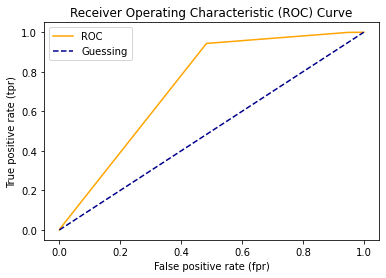

In [44]:
# plotting model roc curve

plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0,1],[0,1], color = 'darkblue', linestyle='--', label='Guessing')

plt.xlabel('False positive rate (fpr)')
plt.ylabel('True positive rate (tpr)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

In [45]:
# roc score of the model

roc_auc_score(Y, y_probs_pos)

0.7319542389302814

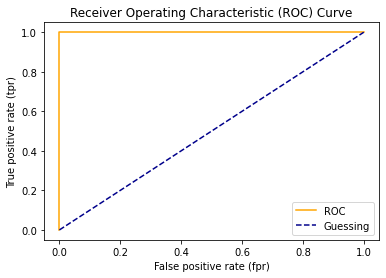

In [46]:
# plotting roc curve in perfect conditions

fpr, tpr, tresholds = roc_curve(y, y)
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0,1],[0,1], color = 'darkblue', linestyle='--', label='Guessing')

plt.xlabel('False positive rate (fpr)')
plt.ylabel('True positive rate (tpr)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()


In [47]:
# roc score if in perfect conditions
roc_auc_score(Y,Y)

1.0